In [78]:
import statsmodels.formula.api as smf 
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import scipy

# Generate Heteroscedascity Data

In [79]:
n_samples = 100
y = np.stack([np.random.normal(scale=np.arange(1,n_samples)) 
          for x in range(20)]).std(axis=0)
x = np.arange(1,n_samples)

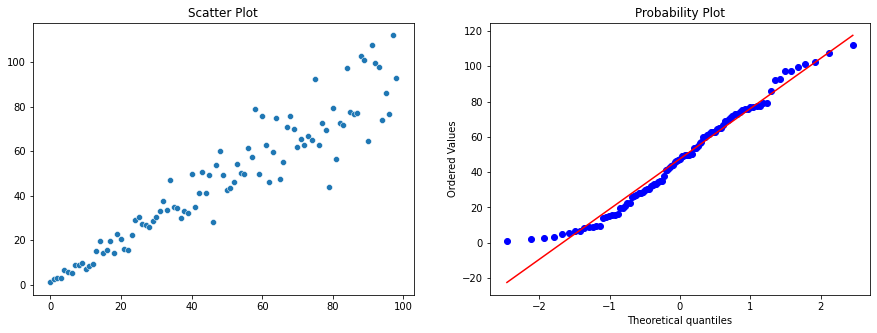

In [80]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=y)
plt.title("Scatter Plot")

plt.subplot(1, 2, 2)
scipy.stats.probplot(y, dist="norm", plot=matplotlib.pyplot)

plt.show()

# OLS

In [81]:
df = pd.DataFrame({'x': pd.Series(data=x), 'y': pd.Series(data=y)})

In [82]:
model_ols = smf.ols("x ~ y", data=df).fit() 

In [83]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     816.5
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           4.95e-49
Time:                        13:12:31   Log-Likelihood:                -361.38
No. Observations:                  99   AIC:                             726.8
Df Residuals:                      97   BIC:                             731.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4957      1.852      2.427      0.0

# Residuals

In [84]:
model_fitted_y = model_ols.fittedvalues
# model residuals
model_residuals = model_ols.resid
# normalized residuals
model_norm_residuals = model_ols.get_influence().resid_studentized_internal
# absolute residuals
model_abs_resid = np.abs(model_residuals)

c:\users\luisf\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


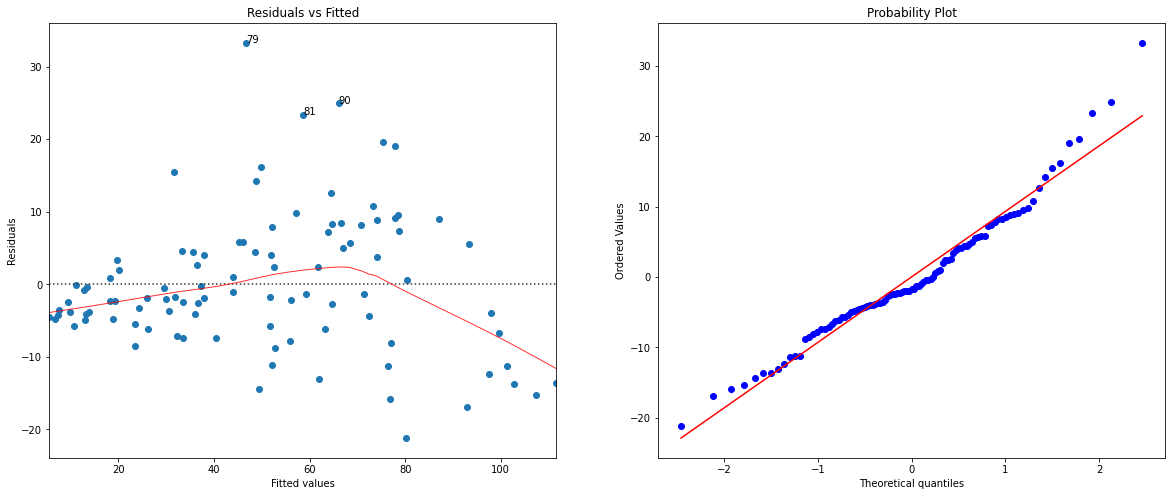

In [85]:
plt.subplot(1, 2, 1)
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(20)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'x', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 1}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]
for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));
    
plt.subplot(1, 2, 2)
scipy.stats.probplot(model_residuals, dist="norm", plot=matplotlib.pyplot)

plt.show()

# WLS

In [51]:
df["weight_1"] = model_fitted_y

In [54]:
model_wls_1 = sm.WLS(y, x, df['weight_1'])

In [55]:
mod_res_1 = model_wls_1.fit() 

In [56]:
print(mod_res_1.summary())

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.975
Model:                            WLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              3806.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                    3.12e-80
Time:                        13:03:10   Log-Likelihood:                         -391.14
No. Observations:                  99   AIC:                                      784.3
Df Residuals:                      98   BIC:                                      786.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# GLS

In [75]:
gls_model = sm.GLS(y, x, sigma=(df['weight_1']**-10))

In [76]:
gls_results = gls_model.fit()

In [77]:
print(gls_results.summary())

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            GLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              8031.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):                    7.68e-96
Time:                        13:08:44   Log-Likelihood:                         -718.75
No. Observations:                  99   AIC:                                      1440.
Df Residuals:                      98   BIC:                                      1442.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------